In [1]:
# import the relevant packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

<b> LOAD THE DATASET </b>

In [2]:
# We can load the fraud dataset straight from data file
df = pd.read_csv('ccFraud.csv')
df.head()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
0,1,1,35,1,3000,4,14,2,0
1,2,2,2,1,0,9,0,18,0
2,3,2,2,1,0,27,9,16,0
3,4,1,15,1,0,12,0,5,0
4,5,1,46,1,0,11,16,7,0


In [3]:
df.shape

(10000000, 9)

In [4]:
df.describe()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,5.000000e+06,1.382177e+00,2.466127e+01,1.030004e+00,4.109920e+03,2.893519e+01,4.047190e+00,9.134469e+00,5.960140e-02
std,2.886751e+06,4.859195e-01,1.497012e+01,1.705991e-01,3.996847e+03,2.655378e+01,8.602970e+00,9.641974e+00,2.367469e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.500001e+06,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00,0.000000e+00
50%,5.000000e+06,1.000000e+00,2.400000e+01,1.000000e+00,3.706000e+03,1.900000e+01,0.000000e+00,6.000000e+00,0.000000e+00
75%,7.500000e+06,2.000000e+00,3.800000e+01,1.000000e+00,6.000000e+03,3.900000e+01,4.000000e+00,1.100000e+01,0.000000e+00
max,1.000000e+07,2.000000e+00,5.100000e+01,2.000000e+00,4.148500e+04,1.000000e+02,6.000000e+01,7.500000e+01,1.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
 #   Column        Dtype
---  ------        -----
 0   custID        int64
 1   gender        int64
 2   state         int64
 3   cardholder    int64
 4   balance       int64
 5   numTrans      int64
 6   numIntlTrans  int64
 7   creditLine    int64
 8   fraudRisk     int64
dtypes: int64(9)
memory usage: 686.6 MB


<b> Description of Dataset </b> <br>
<b>custID: </b>CustomerID, an auto-incrementing integer value <br>
<b>gender:</b> 1-male, 2-female <br>
<b>state: </b>State number, an integer value <br>
<b>cardholder:</b> it is the flag of whether a customer use cards or not, 1-Yes 2-No. <br>
<b>balance:  </b>the credit balance in the account <br>
<b>numTrans: </b>Number of transactions made, an integer value <br>
<b>numIntlTrans:</b> Number of international transactions made, an integer value <br>
<b>creditLine: </b> Limit of Credit of each customer <br>
<b>fraudRisk: </b>0-No fraud, 1-Fraud

In [6]:
df['fraudRisk'].value_counts()

0    9403986
1     596014
Name: fraudRisk, dtype: int64

In [7]:
df['cardholder'].value_counts()

1    9699957
2     300043
Name: cardholder, dtype: int64

In [8]:
df_input = df[['gender','cardholder','numTrans','creditLine']]
# Take first 1000 row of data set, because Decision Tree will run slow with big dataset
df_input=df_input.loc[:1000,:]
# Check what the input looks like
df_input

,gender,cardholder,numTrans,creditLine
0,1,1,4,2
1,2,1,9,18
2,2,1,27,16
3,1,1,12,5
4,1,1,11,7
...,...,...,...,...
996,2,1,37,2
997,1,1,10,12
998,2,1,11,4
999,1,1,39,4


In [9]:
df_target = df[['fraudRisk']]
# Take first 1000 row of data set, because Decision Tree will run slow with big dataset
df_target= df_target.loc[:1000,:]
# Check what the target looks like
df_target

,fraudRisk
0,0
1,0
2,0
3,0
4,0
...,...
996,0
997,0
998,0
999,0


### Creating the Decision Tree

In [10]:
# First, we need to define the decision tree and its parameters, if any
# Then, we need to train/create the tree based on the data
# Both are easily achieved through sklearn, with 2 simple commands

In [11]:
# Defining the tree classifier
clf = DecisionTreeClassifier()

In [12]:
# Training/creating the decision tree
clf = clf.fit(df_input,df_target)

In [13]:
# At this point, we have created a fully working decision tree for the Iris dataset

In [14]:
# We can now give this tree an input, and it will predict the class of the flower
clf.predict([[1,1,40,9]])

C:\Users\hi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### Visualizing the tree

In [15]:
# With sklearn, we also have capabilities to plot the tree

[Text(0.4915941455696203, 0.9666666666666667, 'X[3] <= 9.5\ngini = 0.088\nsamples = 1001\nvalue = [955, 46]'),
 Text(0.12341772151898735, 0.9, 'X[2] <= 71.5\ngini = 0.019\nsamples = 712\nvalue = [705, 7]'),
 Text(0.05063291139240506, 0.8333333333333334, 'X[3] <= 6.5\ngini = 0.009\nsamples = 644\nvalue = [641, 3]'),
 Text(0.02531645569620253, 0.7666666666666667, 'X[2] <= 25.5\ngini = 0.004\nsamples = 533\nvalue = [532, 1]'),
 Text(0.012658227848101266, 0.7, 'gini = 0.0\nsamples = 380\nvalue = [380, 0]'),
 Text(0.0379746835443038, 0.7, 'X[2] <= 26.5\ngini = 0.013\nsamples = 153\nvalue = [152, 1]'),
 Text(0.02531645569620253, 0.6333333333333333, 'X[3] <= 4.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.012658227848101266, 0.5666666666666667, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.0379746835443038, 0.5666666666666667, 'X[0] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.02531645569620253, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.050632911

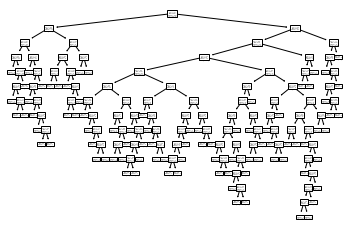

In [16]:
# The default plot_tree function returns a list with text information about the tree and also plots a small image of it
plot_tree(clf)

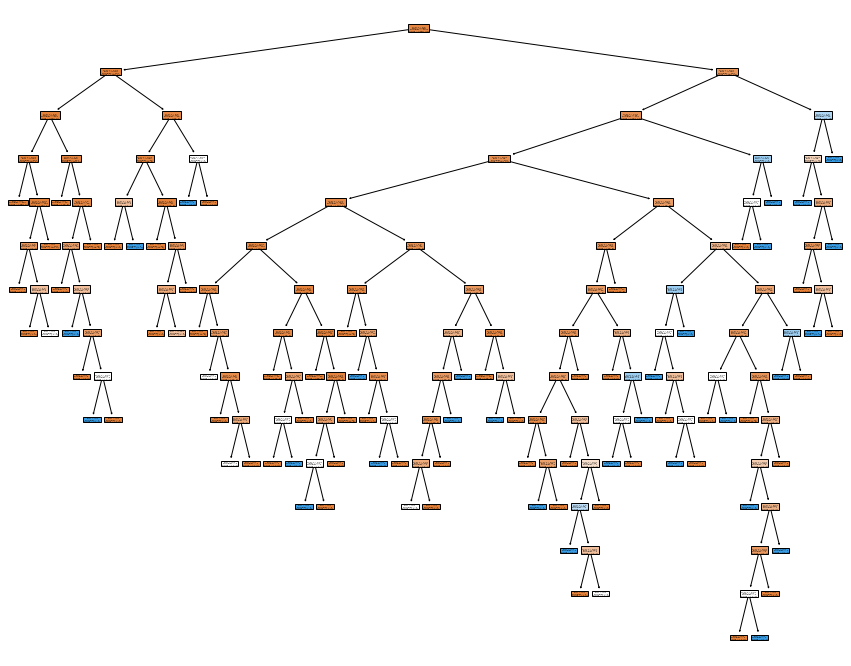

In [17]:
# To better visualize it, we can use matplotlib, and control the size of the figure
plt.figure(figsize=(15,12))
plot_tree(clf, filled=True)
plt.show()

In [18]:
# As can be seen from the image above, though, the features and classes don't have names
# It is not informative, as we don't know what feature X[2] corresponds to
# So, we can add a list of feature and class names to the function

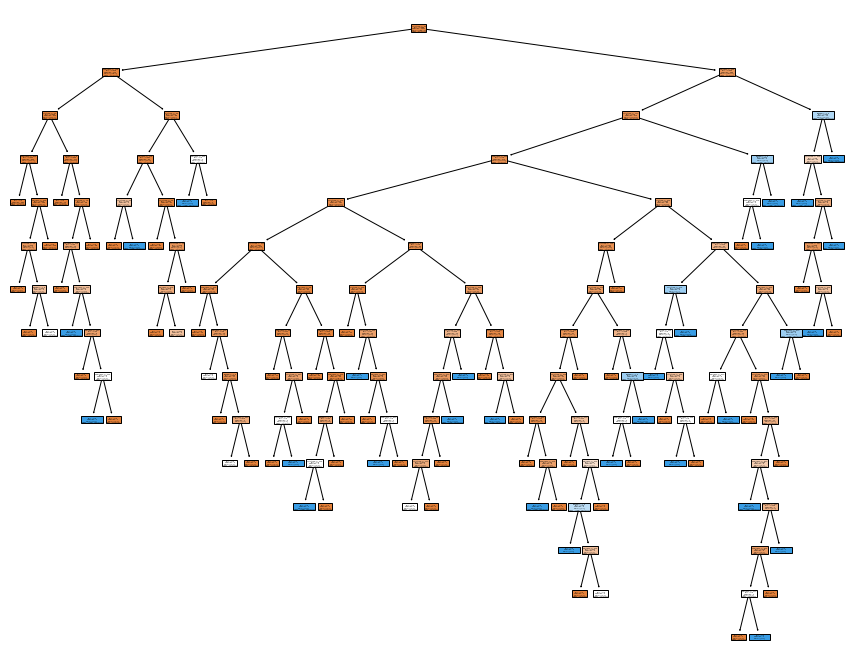

In [19]:
# Adding the feature and class names, as well
plt.figure(figsize=(15,12))
plot_tree(clf, filled=True, 
          feature_names=["gender", "cardholder", "numTrans", "creditLine"], 
          class_names=["No Fraud", "Credit Card Fraud"])
plt.show()

In [20]:
# This picture is very complicated indicating a tree with enormous proportions
# This indicates a high probability that the model has overfitted

### Create the tree with pruning

In [21]:
# Define the model as a decision tree classifier with pruning in order to avoid overfitting
# The value of 0.001 for the pruning seems like a good spot for this particular model
clf = tree.DecisionTreeClassifier(ccp_alpha=0.001)

In [22]:
# Train the tree
clf.fit(df_input,df_target)

DecisionTreeClassifier(ccp_alpha=0.001)

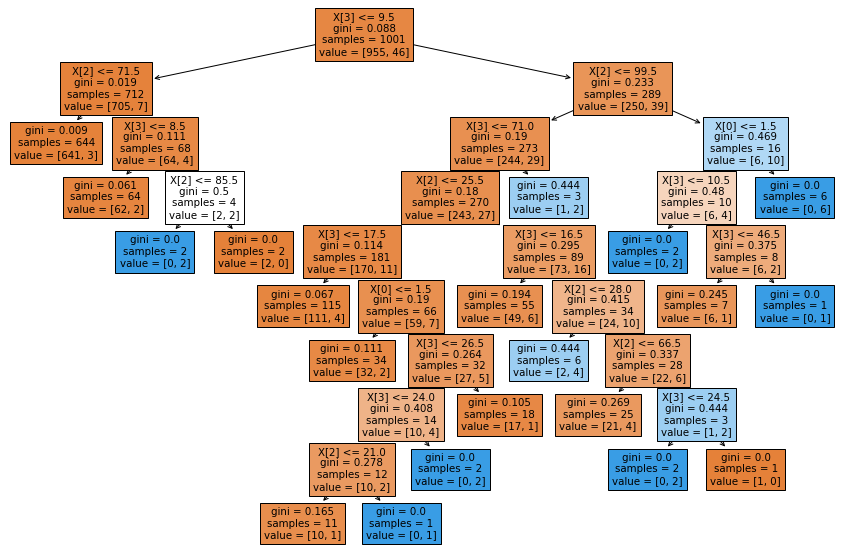

In [23]:
# Plot the tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True)
plt.show()

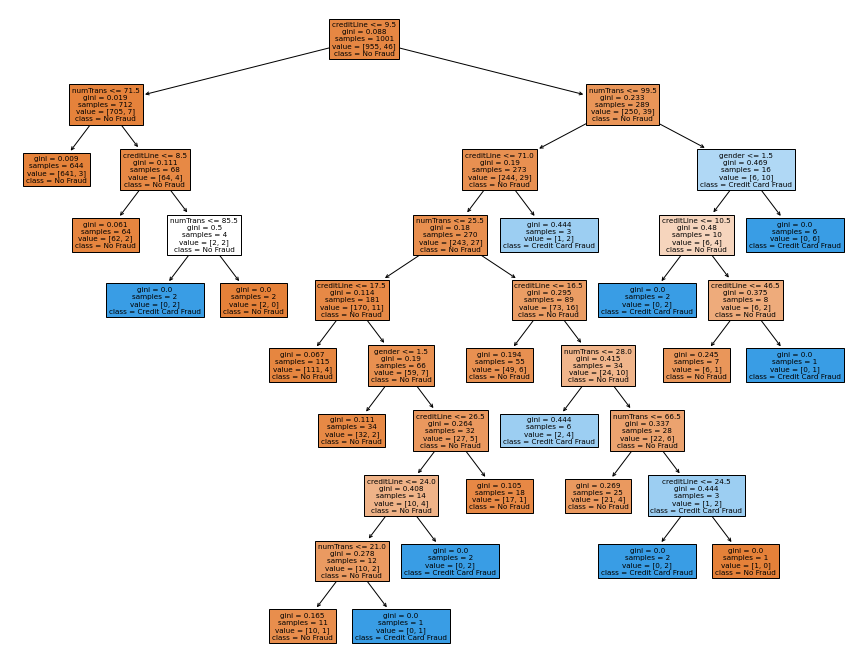

In [24]:
# Adding the feature and class names, as well
plt.figure(figsize=(15,12))
tree.plot_tree(clf, filled=True, 
          feature_names=["gender", "cardholder", "numTrans", "creditLine"], 
          class_names=["No Fraud", "Credit Card Fraud"])
plt.show()